In [2]:
import matplotlib.pyplot as plt
import csv
import numpy as np
import torch

In [10]:
# Setup the root
root = './History/'+'2024_0606_01_53_45_EXP_21/'
root1 = './History/'+'2024_0716_23_05_28_EXP_5/'
root_to_csv = root + 'loss.csv'
root_to_model = root + 'online_model'
root_to_val = root + 'val_acc.csv'

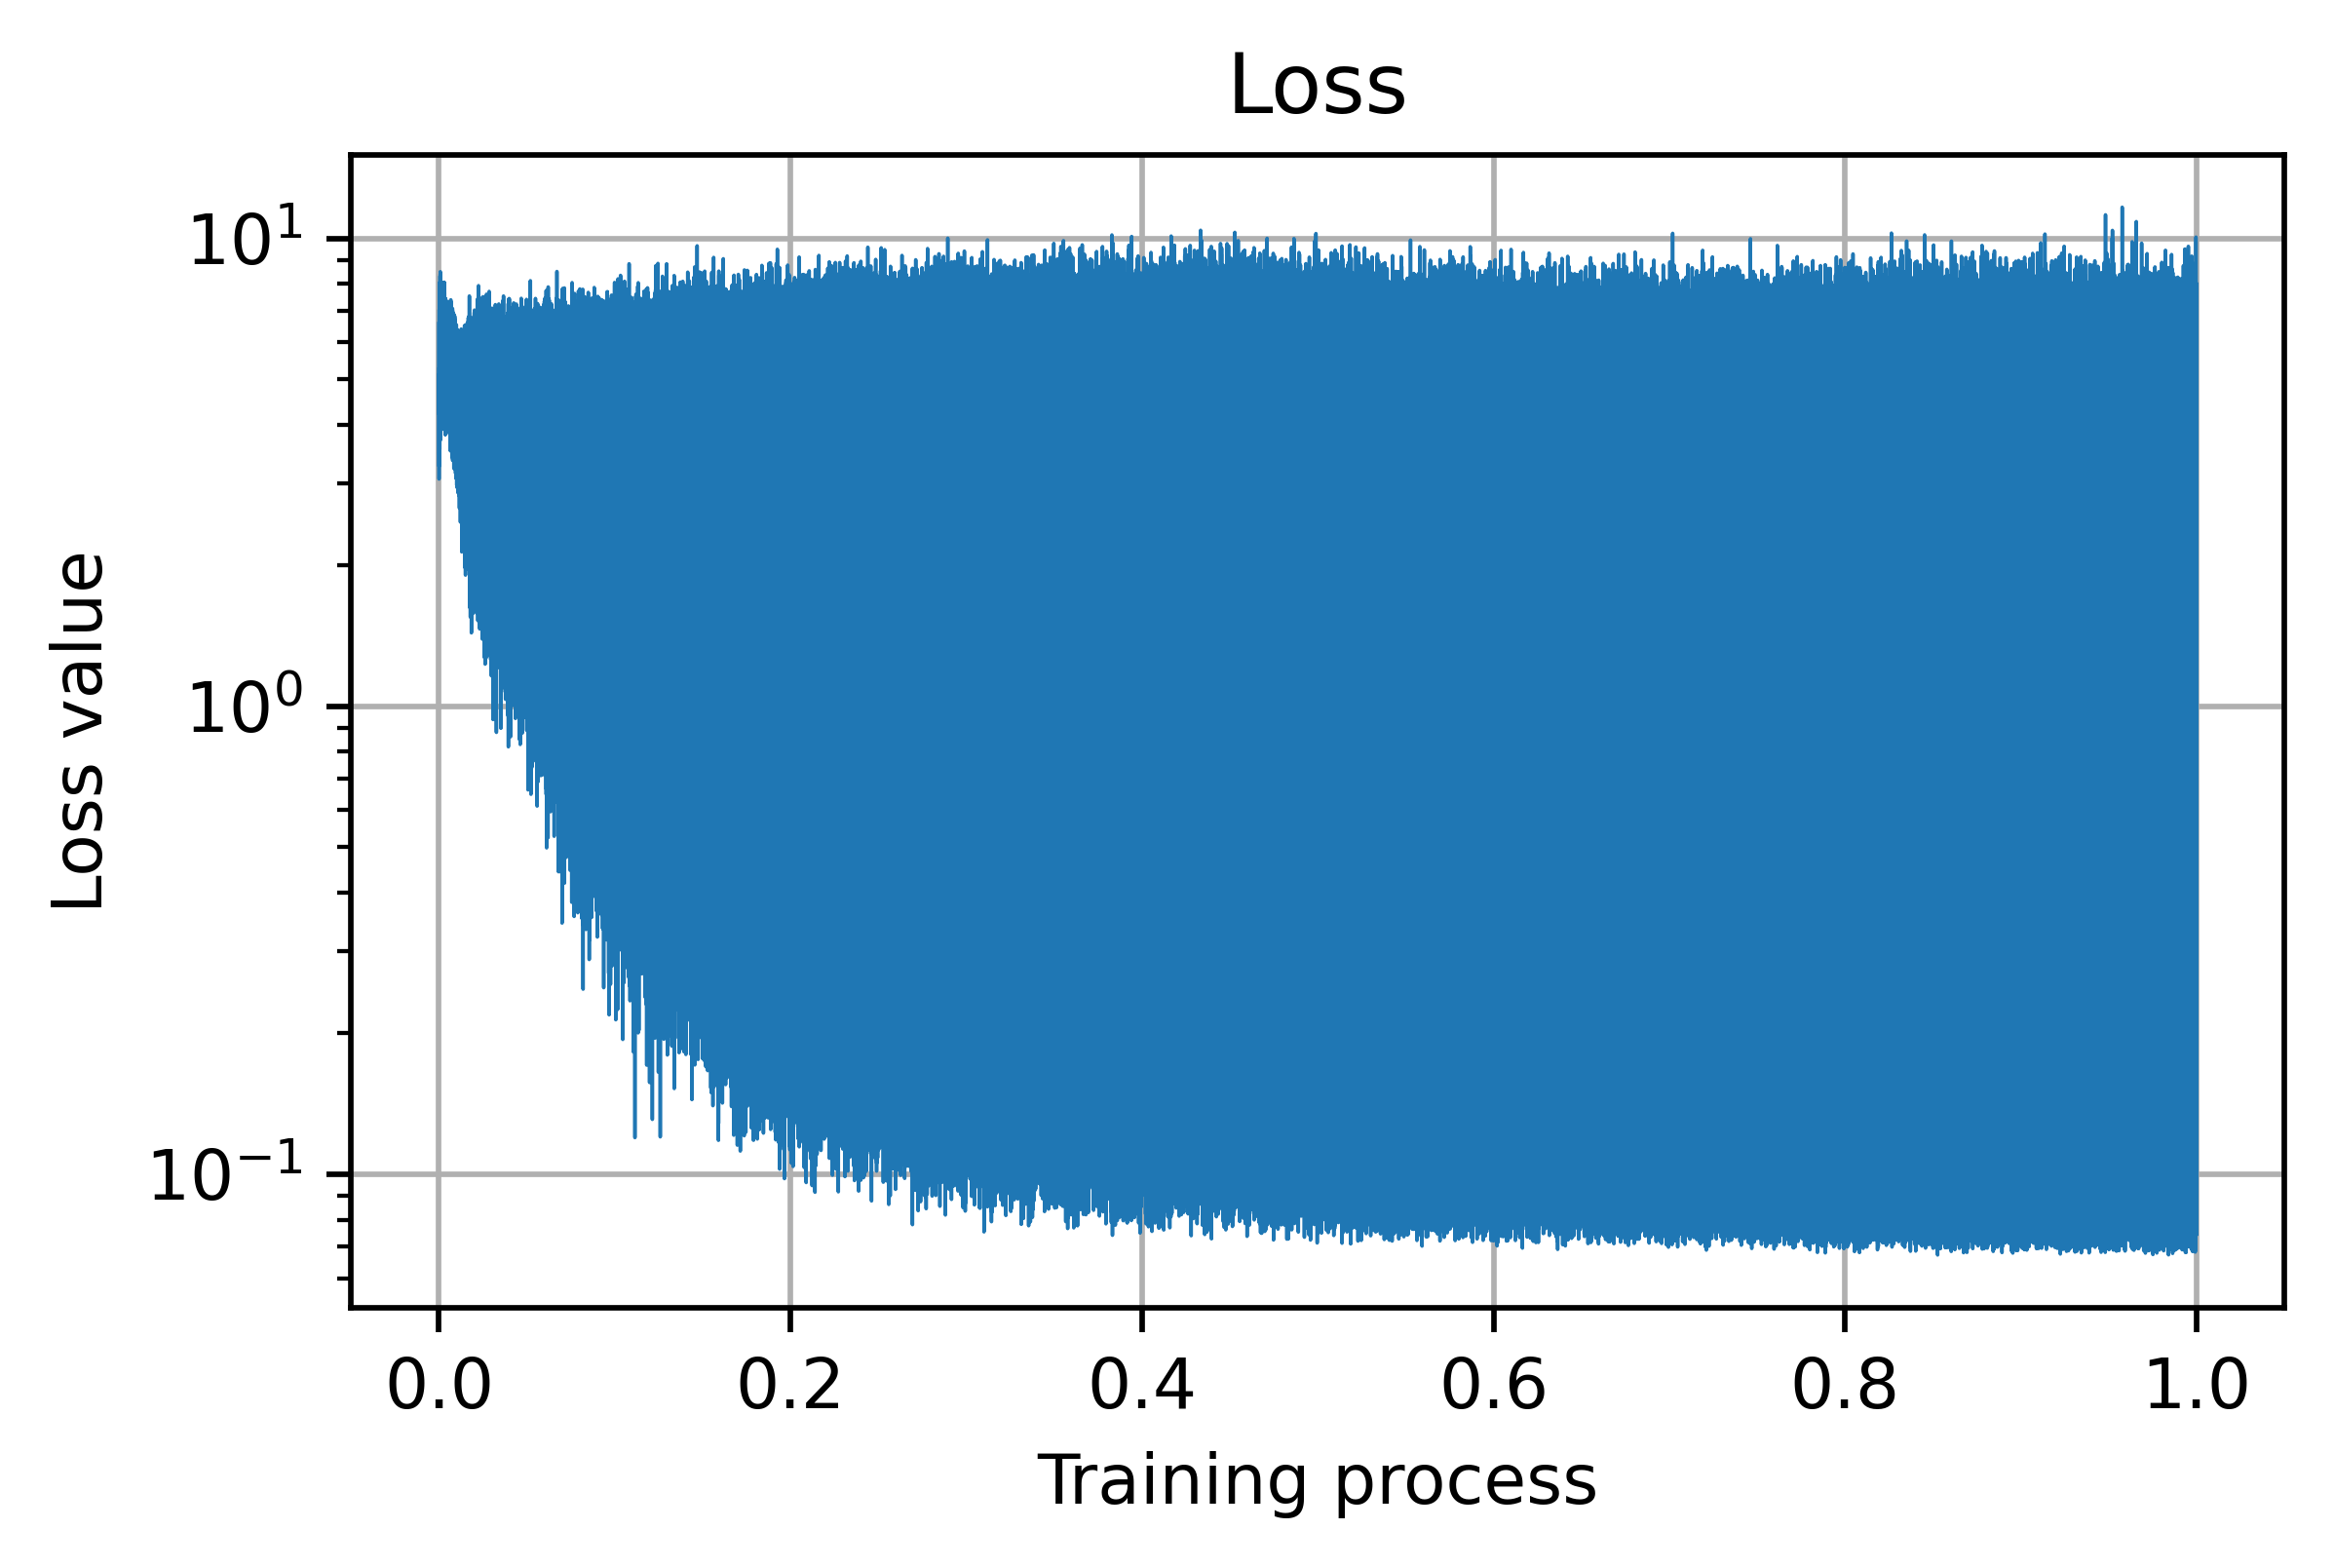

In [11]:
# Initialize lists to hold the data from the CSV
losses = []

# Open the CSV file and read data
with open(root_to_csv, newline='') as csvfile:
    reader = csv.reader(csvfile)
    next(reader)  # Skip the header row if your CSV has headers
    for row in reader:
        losses.append(float(row[0]))  # Assuming the first column can be converted to float

# Plotting the data
plt.figure(figsize=(5, 3), dpi=512)  # Set the figure size (optional)
plt.plot(np.linspace(0,1,len(losses)),losses, linewidth=0.5)  # 'o' for circle markers on each data point
# plt.title('Online Training with EG')  # Title of the plot
plt.title('Loss')
plt.xlabel('Training process')  # Label for x-axis
plt.xscale('linear')
plt.yscale('log')
plt.ylabel('Loss value')  # Label for y-axis
plt.grid(True)  # Show grid lines
plt.show()

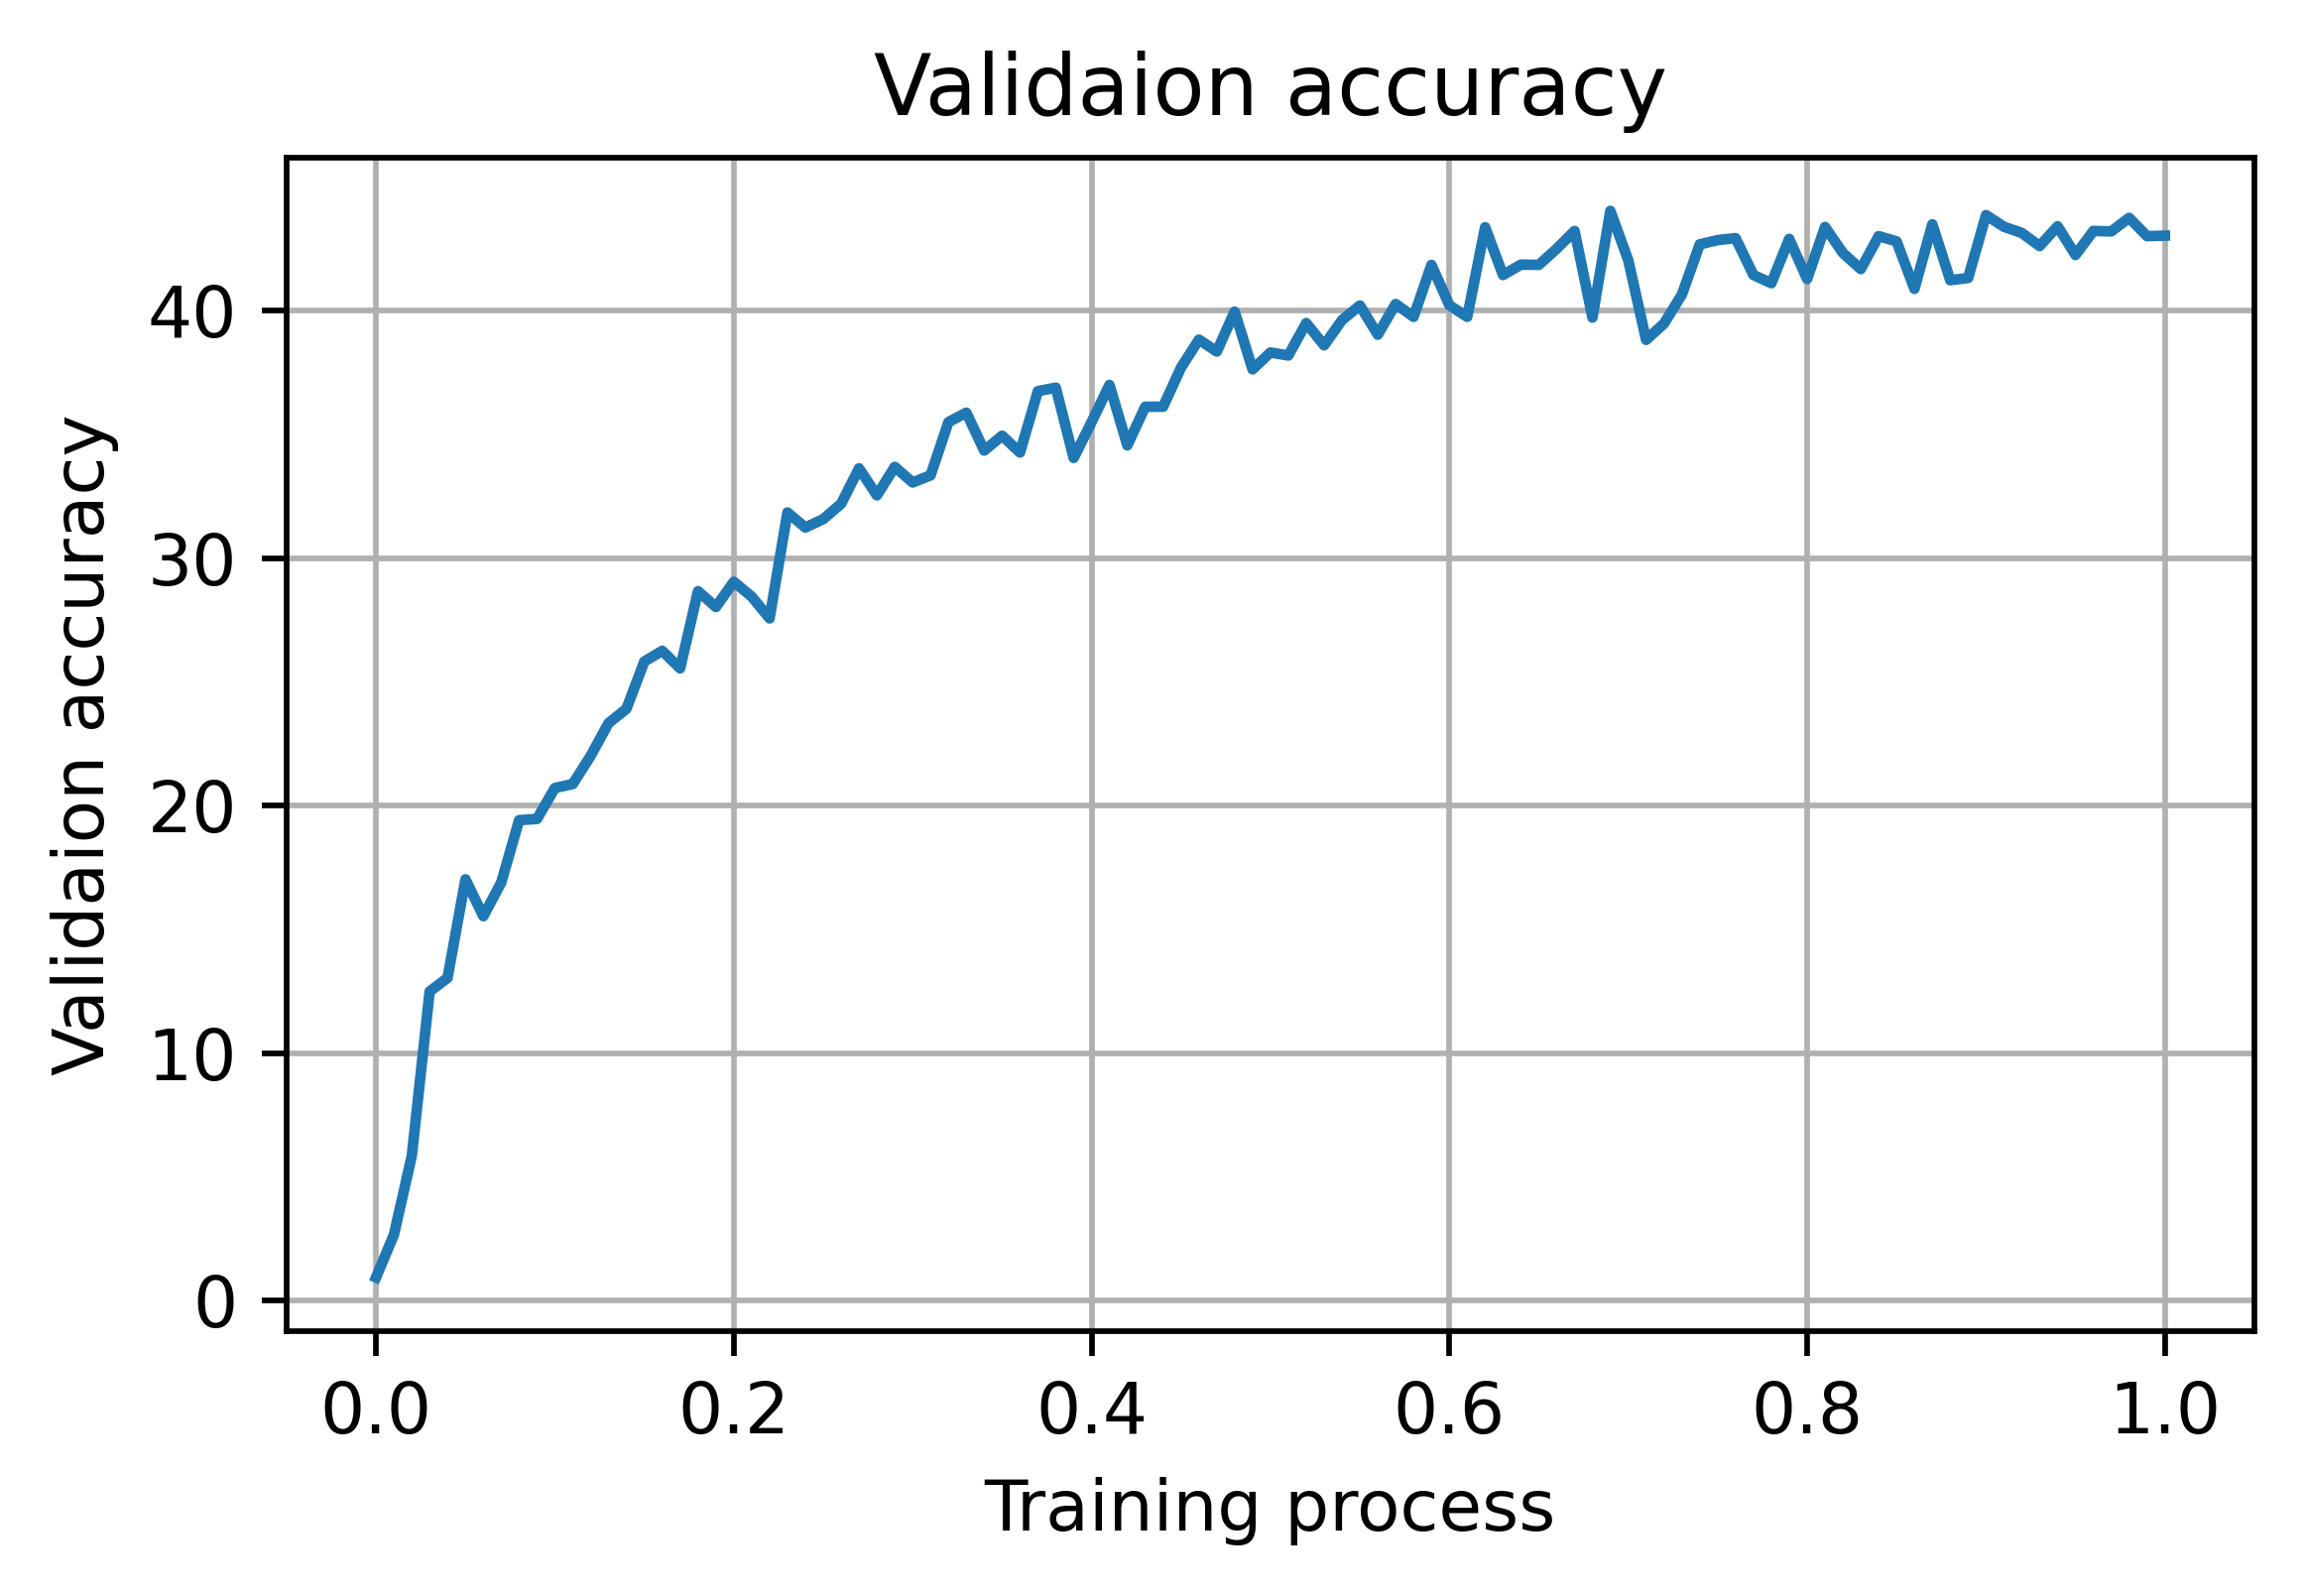

In [12]:
# Open the CSV file and read val data
val_accs = []
with open(root+"val_acc.csv", newline='') as csvfile:
    reader = csv.reader(csvfile)
    next(reader)  # Skip the header row if your CSV has headers
    for row in reader:
        val_accs.append(float(row[0])) 
val_accs = np.array(val_accs)
# Plot the tested accuracy
plt.figure(figsize=(5, 3), dpi=512)
plt.plot(np.linspace(0,1,val_accs.shape[0]), val_accs)
plt.title('Validaion accuracy')  # Title of the plot
plt.xlabel('Training process')  # Label for x-axis
plt.ylabel('Validaion accuracy')  # Label for y-axis
plt.grid(True)  # Show grid lines
# plt.tight_layout()
plt.show()

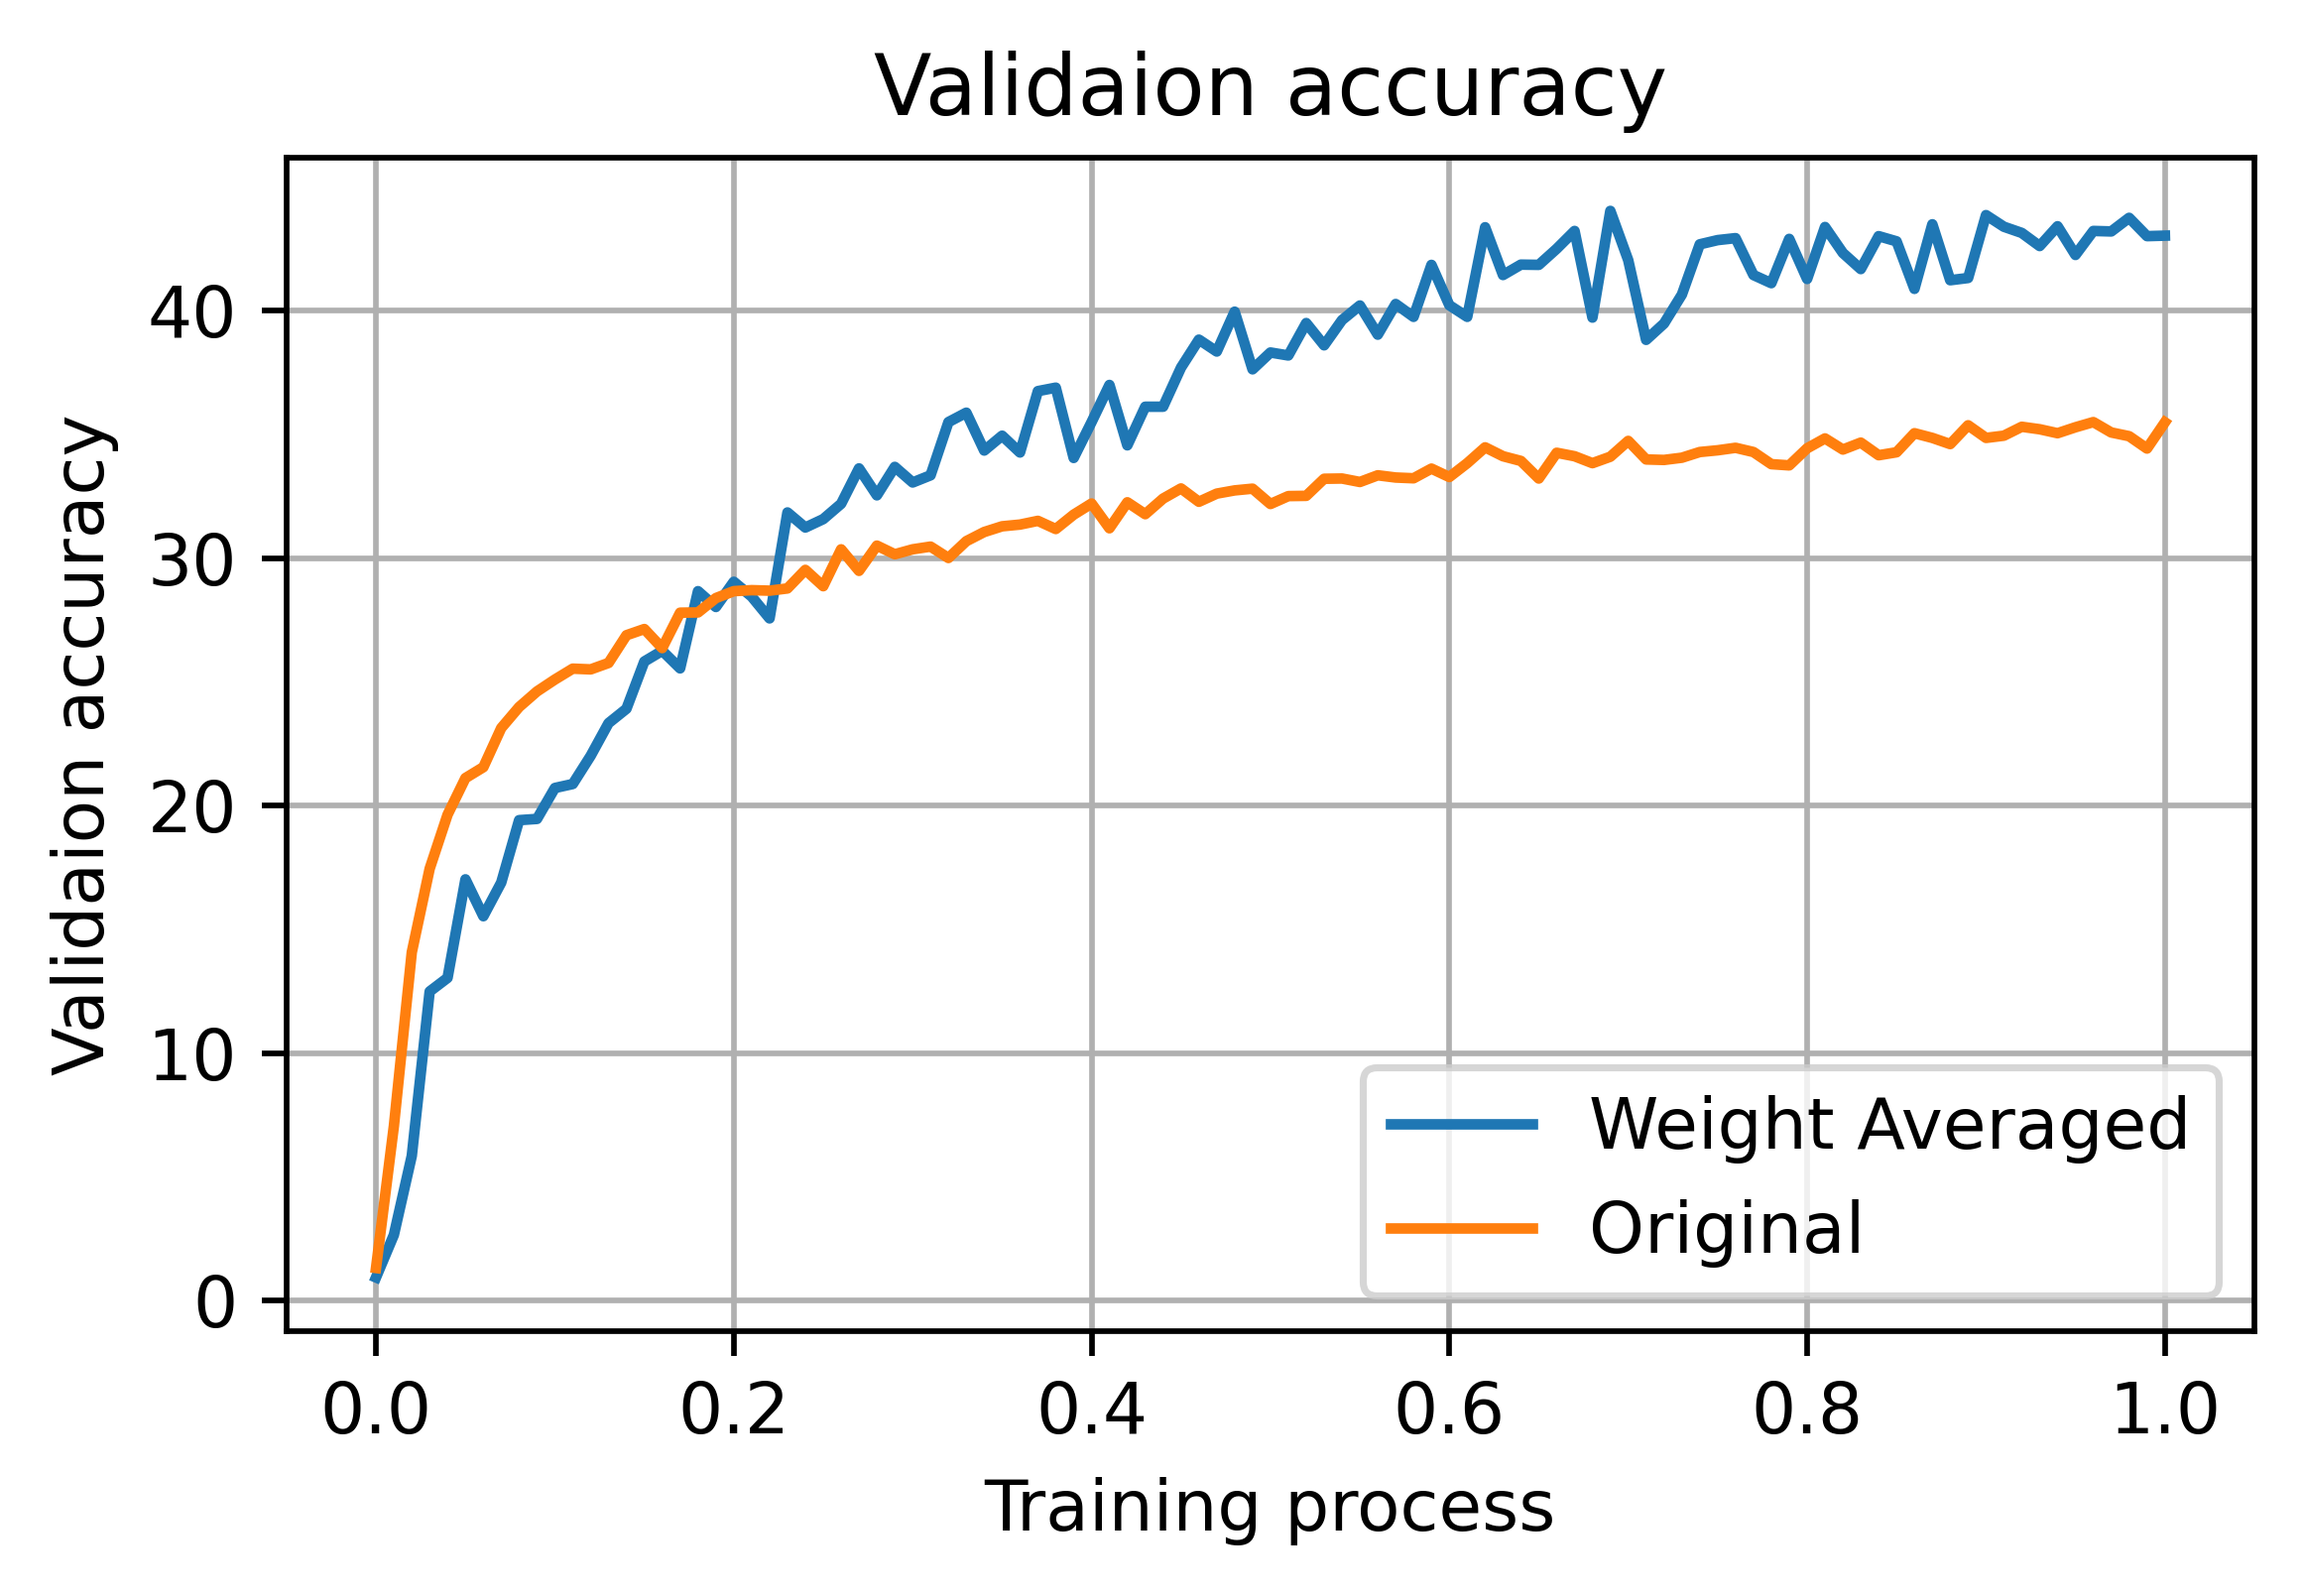

In [13]:
# Open the CSV file and read val data
val_accs = []
with open(root+"val_acc.csv", newline='') as csvfile:
    reader = csv.reader(csvfile)
    next(reader)  # Skip the header row if your CSV has headers
    for row in reader:
        val_accs.append(float(row[0])) 
val_accs = np.array(val_accs)
# Open the CSV file and read val data
val_accs1 = []
with open(root1+"val_acc.csv", newline='') as csvfile:
    reader = csv.reader(csvfile)
    next(reader)  # Skip the header row if your CSV has headers
    for row in reader:
        val_accs1.append(float(row[0])) 
val_accs1 = np.array(val_accs1)
# Plot the tested accuracy
plt.figure(figsize=(5, 3), dpi=512)
plt.plot(
    np.linspace(0,1,val_accs.shape[0]), 
    np.concatenate((val_accs.reshape(val_accs.shape[0],1), val_accs1.reshape(val_accs1.shape[0],1)),axis=1),
    label=['Weight Averaged', 'Original']
)
plt.title('Validaion accuracy')  # Title of the plot
plt.xlabel('Training process')  # Label for x-axis
plt.ylabel('Validaion accuracy')  # Label for y-axis
plt.legend()
plt.grid(True)  # Show grid lines
# plt.tight_layout()
plt.show()

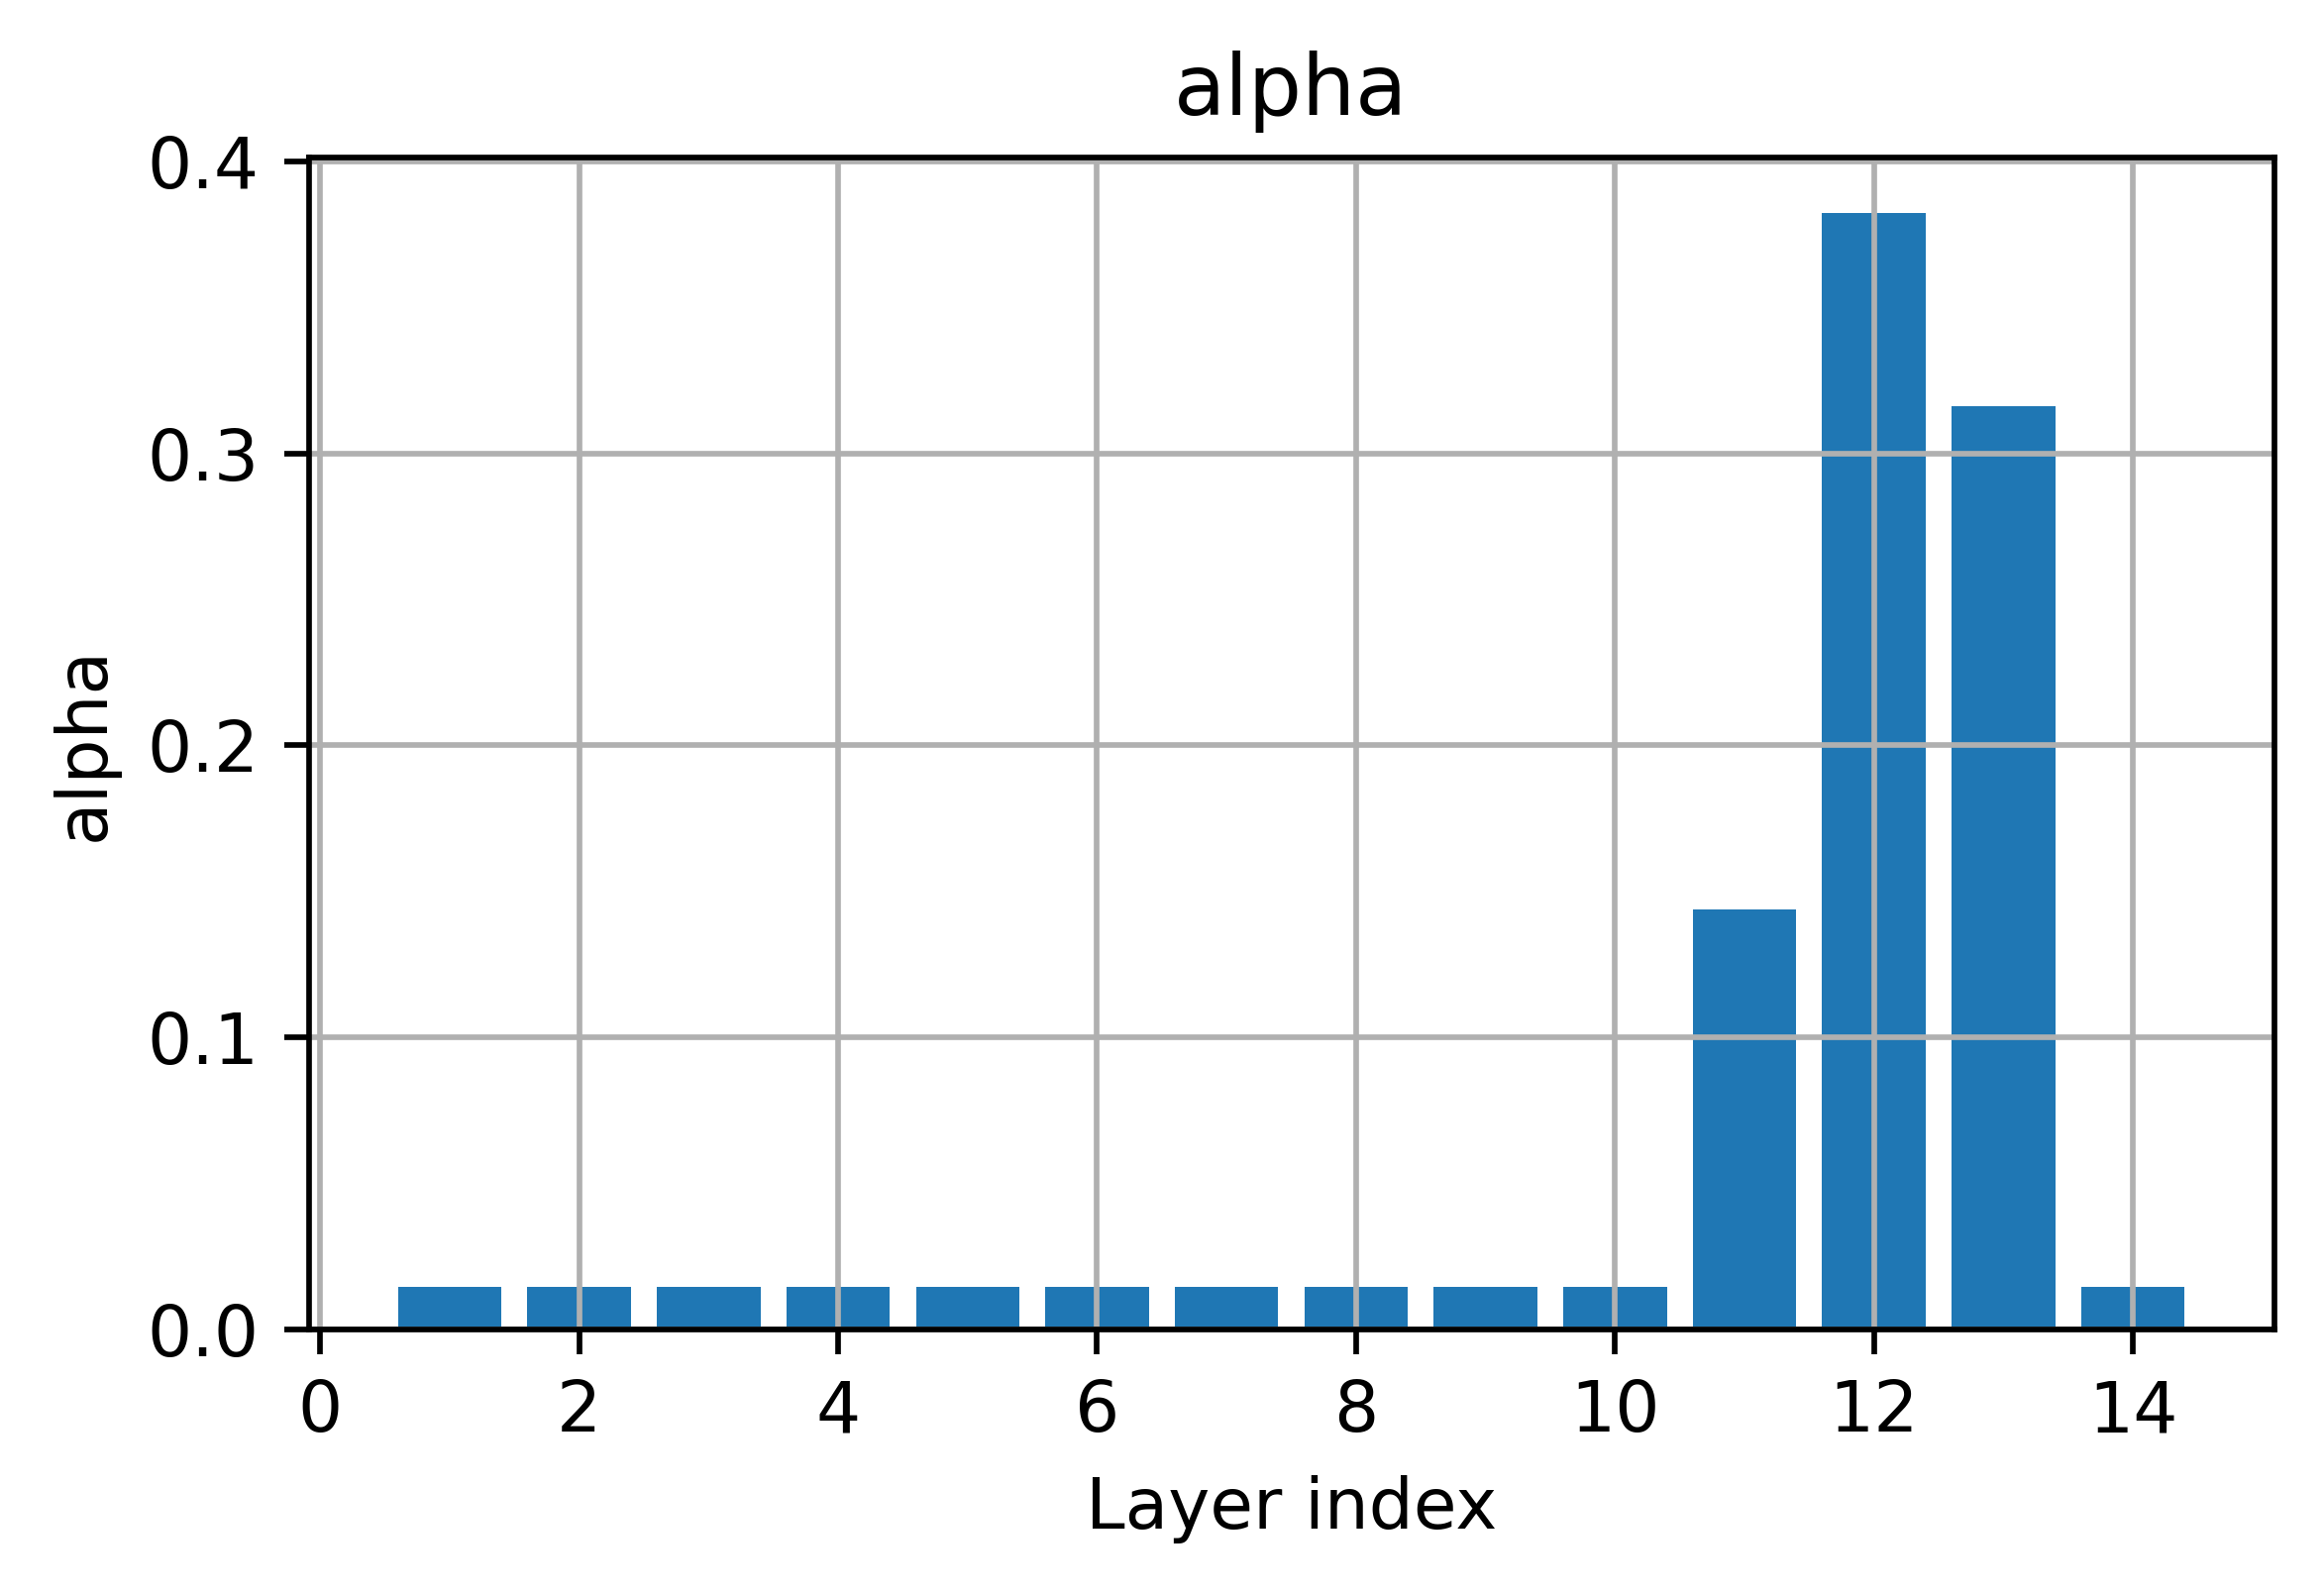

In [14]:
# Drawing the figure of alpha
paras_dict = torch.load(root_to_model)
alpha = paras_dict['alpha'].cpu().numpy()
index = np.linspace(1, len(alpha), len(alpha))
# Plotting the data
plt.figure(figsize=(5, 3), dpi=512)  # Set the figure size (optional)
plt.bar(index,alpha)  # 'o' for circle markers on each data point
plt.title('alpha')  # Title of the plot
plt.xlabel('Layer index')  # Label for x-axis
plt.ylabel('alpha')  # Label for y-axis
plt.grid(True)  # Show grid lines
plt.show()